In [13]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

## TEIS BDI-3 Analysis

[The Tennessee Early Intervention System (TEIS)](https://www.tn.gov/didd/for-consumers/tennessee-early-intervention-system-teis.html) is a voluntary program that offers therapy and other services to families of infants and young children with developmental delays or disabilities. Services are provided at no cost to families. TEIS is critically important to supporting the development of Tennessee children with disabilities and developmental delays as they prepare for school.

In this project, you are going to be working with data gathered from the Battelle Developmental Inventory, Third Edition (BDI-3) Eligibility Evaluation, an early childhood instrument based on the concept of developmental milestones. The BDI-3 is used by TEIS for determining eligibility and outcomes. This assessment tool has been in use for less than a year now, so the purpose of your work is to analyze the scores to see if there appear to be any weaknesses in this tool in any of the assessed domains or subdomains.

The BDI-3 is divided into 5 domains, each of which has 2 or 3 subdomains. On each domain and subdomain, a child receives several different scores. An example score report is available in the BDI3_ScoreReport.pdf file. See page 3 of this file for a detailed description of each score. Note that the BDI-3 is norm-based, meaning that the scores are generated by the child's performance based on the performance of same-aged peers on the same items. 

Some notes about the data:
* The same instrument is used for determining eligibility and outcomes. The type of evaluation can be determined from the "Program Label" column, which will indicate either an eligibility evaluation, an annual evaluation, or a birthday/milestone or exit evaluation. 
* Some of the rows are duplicated, so be sure to check that in your initial data inspection and cleaning. In addition, some children will have multiple rows in the dataset. A child is evaluated at initial eligibility, annually, and at their 3rd birthday or exit under certain circumstances. The evaluation may be repeated every 4 months (e.g. a child was ineligible and re-referred). 
* There are many records that are missing ID numbers. These records have been given a unique identifier which starts with "SP" so that they can be identified.
* When reading the data in, you may notice that some of the values in the RDI columns are incorrectly converted to dates. It is likely that this happens whenever the numerator of the fraction is 12 or less.

#### Exploratory Data Analysis

Reading in the Excel file.

In [14]:
dataset = pd.read_excel(r"C:\Users\mgood\Documents\nss_data_analytics\projects\teis-concat-dog\data\all_evals.xlsx")

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23944 entries, 0 to 23943
Columns: 219 entries, Child ID to Code 10
dtypes: datetime64[ns](14), float64(79), object(126)
memory usage: 40.0+ MB


Dropping duplicates. See below, we go from 23947 entries in `dataset` 19500 entries in `teis_df`.

In [50]:
dataset_clean = dataset.drop_duplicates()

In [53]:
dataset_clean.columns = dataset_clean.columns.str.replace(' ', '_')

In [54]:
dataset_clean.columns = dataset_clean.columns.str.replace('-', '_')

In [55]:
dataset_clean.columns = dataset_clean.columns.str.replace('__', '_')

In [56]:
check_columns = ['Adaptive_Sum_of_Scaled_Scores', 'Social_Emotional_Sum_of_Scaled_Scores', 'Communication_Sum_of_Scaled_Scores', 'Motor_Sum_of_Scaled_Scores', 'Cognitive_Sum_of_Scaled_Scores']

In [57]:
dataset_clean.dropna(subset=check_columns, how='all', inplace=True)

C:\Users\mgood\AppData\Local\Temp\ipykernel_8080\2153370628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean.dropna(subset=check_columns, how='all', inplace=True)


In [59]:
dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19497 entries, 0 to 23943
Columns: 219 entries, Child_ID to Code_10
dtypes: datetime64[ns](14), float64(79), object(126)
memory usage: 32.7+ MB


In [77]:
dataset_clean.groupby(dataset_clean['Program_Label']).size()

Program_Label
BDI-3 Annual Evaluation                6904
BDI-3 Eligibility Evaluation          12390
BDI-3 Milestone or Exit Evaluation      203
dtype: int64

7. Is there any notable pattern of scoring by region? Note: TEIS contracts with three agencies for evaluations (one per grand region) as follows:  
* East TN, First TN and Southeast
* Greater Nashville, Upper Cumberland, and South Central
* Northwest, Southwest, and Memphis Delta

In [79]:
dataset_clean.groupby(dataset_clean['Gender']).size()

Gender
F     7246
M    11957
U      294
dtype: int64

* 6624 - east
* 8017 - middle
* 4770 - west

In [80]:
dataset_clean[dataset_clean['Location__Sub_Level_1'].isnull()]

,Child_ID,Gender,Date_of_Birth,Location__Sub_Level_1,Program_Label,Adaptive_Sum_of_Scaled_Scores,Adaptive_Developmental_Quotient,Adaptive_Percentile_Rank,Adaptive_95%_Confidence_Interval,Adaptive_RDI,...,Code_2,Code_3,Code_4,Code_5,Code_6,Code_7,Code_8,Code_9,Code_10,Location_Group
117,481875,M,2020-04-22,NaN,BDI-3 Annual Evaluation,19.0,97.0,42,90-104,82/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
159,484037,M,2019-12-03,NaN,BDI-3 Annual Evaluation,3.0,49.0,<0.1,45-59,1990-03-01 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
237,485687,F,2020-05-17,NaN,BDI-3 Annual Evaluation,8.0,64.0,1,59-73,18/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
318,487138,F,2020-06-28,NaN,BDI-3 Annual Evaluation,27.0,121.0,92,113-127,97/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
581,491452,M,2020-05-22,NaN,BDI-3 Annual Evaluation,22.0,106.0,66,99-113,93/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22548,SP01896,F,2020-09-07,NaN,BDI-3 Annual Evaluation,28.0,124.0,95,116-130,98/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
22556,SP01904,M,2020-06-06,NaN,BDI-3 Annual Evaluation,17.0,91.0,27,85-99,73/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
22582,SP01930,M,2020-06-10,NaN,BDI-3 Annual Evaluation,24.0,112.0,79,104-118,96/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
22592,SP01940,M,2021-09-22,NaN,BDI-3 Annual Evaluation,9.0,95.0,37,86-106,87/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other


In [74]:
location_groups = {
    'East Tennessee': 'East',
    'First Tennessee': 'East',
    'Southeast Tennessee': 'East',
    'Greater Nashville': 'Middle TN',
    'Upper Cumberland': 'Middle TN',
    'South Central': 'Middle TN',
    'Northwest': 'West',
    'Southwest': 'West',
    'Memphis Delta': 'West'
}


dataset_clean['Location_Group'] = dataset_clean['Location__Sub_Level_1'].map(location_groups)


dataset_clean['Location_Group'].fillna('Other', inplace=True)

C:\Users\mgood\AppData\Local\Temp\ipykernel_8080\581902080.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean['Location_Group'] = dataset_clean['Location__Sub_Level_1'].map(location_groups)
C:\Users\mgood\AppData\Local\Temp\ipykernel_8080\581902080.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean['Location_Group'].fillna('Other', inplace=True)


In [81]:
dataset_clean.groupby(dataset_clean['Location__Sub_Level_1']).size()

Location__Sub_Level_1
East Tennessee         3340
First Tennessee        1701
Greater Nashville      3435
Memphis Delta          2715
Northwest               955
South Central          2560
Southeast Tennessee    1583
Southwest              1100
Upper Cumberland       2021
dtype: int64

In [82]:
percent_blank = dataset_clean.isnull().sum() * 100 / len(dataset_clean)
# percent_blank_df = pd.DataFrame({'column_name': df.columns,
#                                  'percent_missing': percent_missing})

In [83]:
print(percent_blank)

Child_ID                   0.000000
Gender                     0.000000
Date_of_Birth              0.000000
Location__Sub_Level_1      0.446222
Program_Label              0.000000
                            ...    
Code_7                   100.000000
Code_8                   100.000000
Code_9                   100.000000
Code_10                  100.000000
Location_Group             0.000000
Length: 220, dtype: float64


In [86]:
dataset_clean.head()

,Child_ID,Gender,Date_of_Birth,Location__Sub_Level_1,Program_Label,Adaptive_Sum_of_Scaled_Scores,Adaptive_Developmental_Quotient,Adaptive_Percentile_Rank,Adaptive_95%_Confidence_Interval,Adaptive_RDI,...,Code_2,Code_3,Code_4,Code_5,Code_6,Code_7,Code_8,Code_9,Code_10,Location_Group
0,44879,F,2022-09-27,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West
1,47795,F,2020-12-23,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Middle TN
2,54340,M,2021-06-22,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East
3,54344,F,2022-03-07,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East
4,54515,M,2021-11-04,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,1990-09-01 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West


In [87]:
location_check = ['Location__Sub_Level_1']

In [88]:
dataset_clean.dropna(subset=location_check,how='all', inplace=True)

C:\Users\mgood\AppData\Local\Temp\ipykernel_8080\2506459002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean.dropna(subset=location_check,how='all', inplace=True)


In [89]:
dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19410 entries, 0 to 23943
Columns: 220 entries, Child_ID to Location_Group
dtypes: datetime64[ns](14), float64(79), object(127)
memory usage: 32.7+ MB


In [90]:
# filter for all PR columns
pr_columns = [col for col in dataset_clean.columns if 'PR' in col]


for col in pr_columns:
    dataset_clean[col] = pd.to_numeric(dataset_clean[col], errors='coerce')


location_grouped_data = dataset_clean.groupby('Location_Group')


pr_stats = {col: location_grouped_data[col].agg(['mean', 'median', 'std', 'count', 'min', 'max']) for col in pr_columns}


for col, stats in pr_stats.items():
    print(f"Statistics for {col}:\n", stats, "\n")


Statistics for Adaptive_Self_Care_PR:
                      mean  median        std  count  min   max
Location_Group                                                
East            30.128285    25.0  24.909779   6127  1.0  99.0
Middle TN       29.599756    25.0  24.994755   7383  1.0  99.0
West            30.855980    25.0  25.947653   4423  1.0  99.0 

Statistics for Adaptive_Personal_Responsibility_PR:
                      mean  median        std  count  min   max
Location_Group                                                
East            33.909190    25.0  28.008053   2753  1.0  99.0
Middle TN       40.886159    37.0  31.399522   3663  1.0  99.0
West            38.977138    37.0  29.787467   2187  1.0  99.0 

Statistics for Social_Emotional_Adult_Interaction_PR:
                      mean  median        std  count  min   max
Location_Group                                                
East            53.181037    50.0  25.771027   6518  1.0  99.0
Middle TN       55.158943    6

C:\Users\mgood\AppData\Local\Temp\ipykernel_8080\1757028541.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean[col] = pd.to_numeric(dataset_clean[col], errors='coerce')


In [ ]:
# filter for all PR columns
pr_columns = [col for col in dataset_clean.columns if 'PR' in col]


for col in pr_columns:
    dataset_clean[col] = pd.to_numeric(dataset_clean[col], errors='coerce')


location_grouped_data = dataset_clean.groupby('L')


pr_stats = {col: location_grouped_data[col].agg(['mean', 'median', 'std', 'count', 'min', 'max']) for col in pr_columns}


for col, stats in pr_stats.items():
    print(f"Statistics for {col}:\n", stats, "\n")

In [ ]:
# Looking at how to group aggregations by locations:

# idx_cols = ['category', 'mark']
# agg_dict = {'num1': {'Sum': 'sum'}, 'num2': {'Count': 'count'}}

# df.set_index(idx_cols).groupby(level=[0, 1]).agg(agg_dict).unstack()

STOP HERE UNTIL 7 IS ANSWERED

************

ADDITIONAL QUESTIONS BELOW

Project Objectives:
1. In which domains (and sub-domains) are children performing highest and lowest?

* Make an age column
* Percentile rank might be a good measure since it's for their age group. 

2. What is the pattern of children's scores? Do individual children tend to perform similarly across all domains or are there differences from domain to domain? Are these patterns similar for all children?

<Axes: xlabel='Adaptive_Developmental_Quotient', ylabel='Count'>

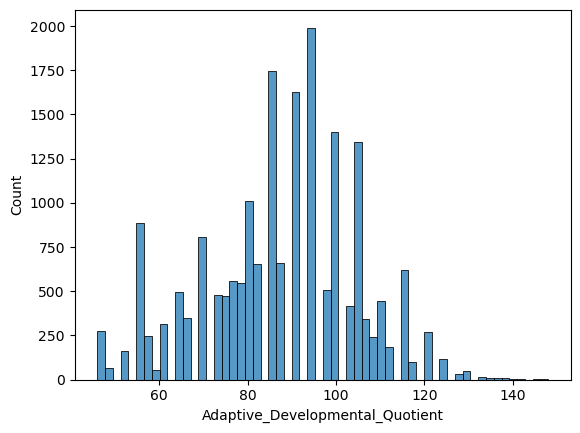

In [67]:
sns.histplot(dataset,
                 x = dataset_clean['Adaptive_Developmental_Quotient'])

<Axes: xlabel='Motor_Developmental_Quotient', ylabel='Count'>

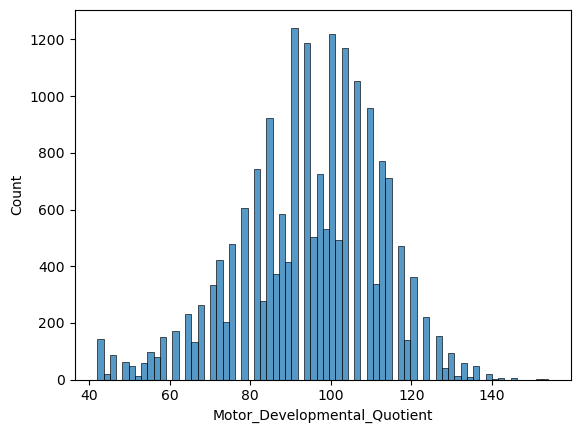

In [68]:
sns.histplot(dataset,
                 x = dataset_clean['Motor_Developmental_Quotient'])

<Axes: xlabel='Cognitive_Developmental_Quotient', ylabel='Count'>

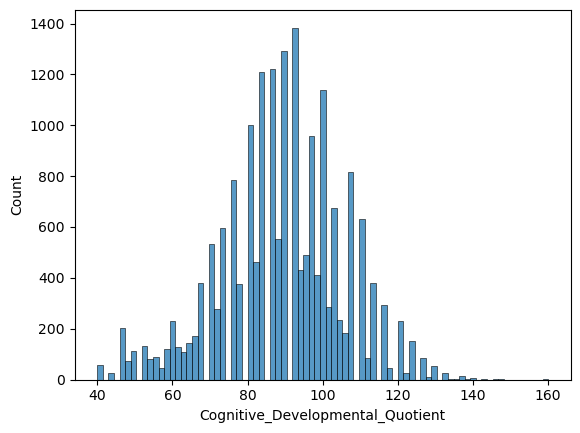

In [69]:
sns.histplot(dataset,
                 x = dataset_clean['Cognitive_Developmental_Quotient'])

<Axes: xlabel='Communication_Developmental_Quotient', ylabel='Count'>

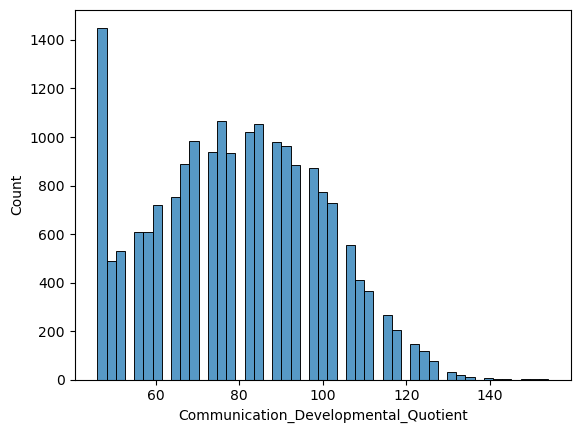

In [70]:
sns.histplot(dataset,
                 x = dataset_clean['Communication_Developmental_Quotient'])

<Axes: xlabel='Social_Emotional_Developmental_Quotient', ylabel='Count'>

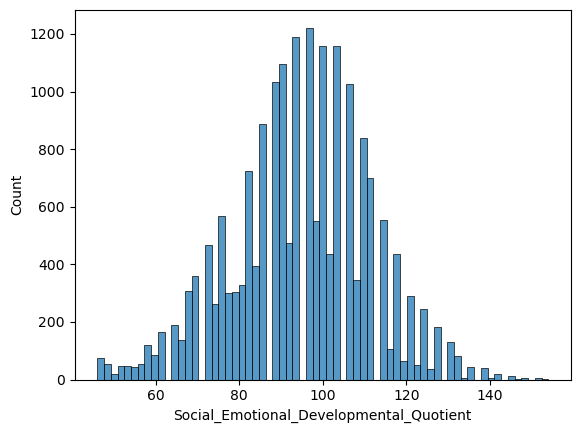

In [71]:
sns.histplot(dataset,
                 x = dataset_clean['Social_Emotional_Developmental_Quotient'])

<Axes: xlabel='BDI_3_Total_Developmental_Quotient', ylabel='Count'>

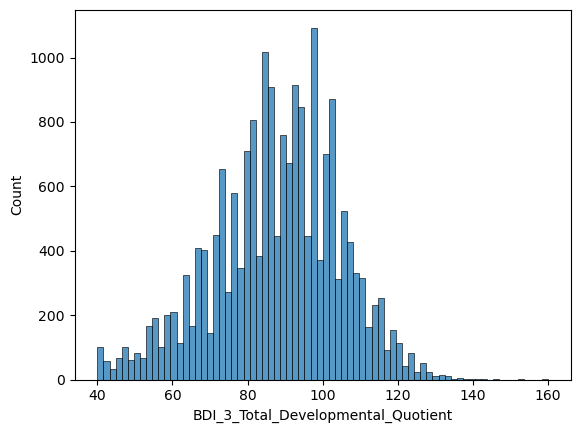

In [72]:
sns.histplot(dataset,
                 x = dataset_clean['BDI_3_Total_Developmental_Quotient'])

3. Is there a pattern of significant differences in children's scores in the sub-domains within a domain? For example, a gap between a child's expressive (talking) and receptive (understanding) language scores may indicate that additional evaluation is needed for that child's eligibility. A gap between these sub-domains for all or most children may indicate the BDI-3 tool may lack sensitivity in the language domain.

4. Does the child's age seem to impact their scoring?

5. Eligibility is currently based on domains. A child would be considered eligible based on a 40% delay in one area or 25% delay in two areas, as determined by Development Quotient (DQ) scores. A DQ of 70 or less indicates a 40% delay, and a DQ between 71 and 78 indicates a 25% delay. If TEIS added an option for eligibility based on the total score on the BDI-3 total score (DQ score of 70 or less), are there any children who would have qualified that did not qualify based on the current method?

6. Is there any difference in scoring noted based on evaluation type?

8. Is there any notable pattern of scoring by evaluator?

Stretch Goal:
* Investigate the records that are missing ID values. Have they gotten better or worse over time? Are there repeat offenders?
* As noted above, this evaluation may be repeated every 4 months. How often did it occur that a child was assessed multiple times in a time period of less than 120 days. Has this gotten better or worse over time?


(question: does "better or worse" mean that more repeat testing is better?)